# Week 2 HW - Pandas Basics
<span  style="color:purple; font-size:20px">
Systems & Technologies: Python  
Week 2
</span>

---

We covered a lot of the basics of the Pandas library. Mastering the fundamentals of Pandas Series/DataFrames as well as some of the basic methods will equip you for more advanced data analysis.

The goal of this activity is to practice reading-in data, extracting useful information from the data by creating useful summaries and visualizations about the specific variables contained in the data.

---

# `tips`

Food servers' tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

A complete description of the variables and their meanings is available in the data dictionary table below:

|obs  | Observation number |
|---  |---                 |
| total_bill | Total bill (cost of the meal), including tax, in US dollars |
| tip | Tip (gratuity) in US dollars |
| sex | Sex of person paying for the meal (0=male, 1=female) |
| smoker | Smoker in party? (0=No, 1=Yes) |
| day | Day of Week (4=Thur, 5=Fri, 6=Sat, 7=Sun) |
| time | Dinner, Lunch |
|size  | Size of the party |

### Exercise 1: (1 points)
<span  style="color:purple; font-size:16px">Read in `../data-sets/tips.csv` data.</span>

In [3]:
# Exercise Answer
import pandas as pd

tips = pd.read_csv(r'C:\Users\malab\OneDrive\Documents\Systems and Technologies; Python\ST-Python 64502\ST-Python 64502\notebooks\data-sets\tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,7,Dinner,2
1,10.34,1.66,1,0,7,Dinner,3
2,21.01,3.50,1,0,7,Dinner,3
3,23.68,3.31,1,0,7,Dinner,2
4,24.59,3.61,0,0,7,Dinner,4


### Exercise 2: (2 points)
<span  style="color:purple; font-size:16px">Determine the number of rows and columns in the data. What does each row in the data represent?</span>

In [5]:
# Exercise Answer
tips.shape

# Each row in the data represents a party visiting the restaurant

(244, 7)

### Exercise 3: (2 points)
<span  style="color:purple; font-size:16px">Determine total amount of memory the data takes up.</span>

In [6]:
# Exercise Answer
tips.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 26.5 KB


### Exercise 4: (5 points)
<span  style="color:purple; font-size:16px">Determine if there are any missing values in the data.</span>

In [7]:
# Exercise Answer
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Exercise 5: (5 points)
<span  style="color:purple; font-size:16px">The column names are not very descriptive. Use the `.rename()` method to rename the columns.</span>

Rename the columns as follows:
+ `tip` to `tip_amount`
+ `day` to `day_of_week`
+ `size` to `party_size`


In [8]:
# Exercise Answer
name_change = {'tip':'tip_amount', 'day':'day_of_week', 'size':'party_size'}

tips.rename(columns = name_change, inplace = True)
tips.head()

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size
0,16.99,1.01,0,0,7,Dinner,2
1,10.34,1.66,1,0,7,Dinner,3
2,21.01,3.50,1,0,7,Dinner,3
3,23.68,3.31,1,0,7,Dinner,2
4,24.59,3.61,0,0,7,Dinner,4


### Exercise 6: (5 points)
<span  style="color:purple; font-size:16px">Extract the index using tips.index(). What type of index do you find? Is there a sensical column to use for the index? Why or why not?</span>

In [10]:
# Exercise Answer
tips.index

# The type of index found is a RangeIndex. There is not a sensible column to use for the index because there aren't any 
# unique identifiers such as "name" or "id" to index with. 

RangeIndex(start=0, stop=244, step=1)

### Exercise 7: (5 points)
<span  style="color:purple; font-size:16px">Recode the `sex`, `smoker`, and `day_of_week` variables to the coding in the data dictionary description table at the top of the notebook. For example: recode `day_of_week` from the numeric representation (4, 5, 6, 7) to the ('Thur', 'Fri', 'Sat', 'Sun'). </span>

In [13]:
# Exercise Answer
sexes = {0:'Male', 1:'Female'}
smokers = {0:'No', 1:'Yes'}
days_of_week = {4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}
tips['sex'] = tips['sex'].replace(sexes)
tips['smoker'] = tips['smoker'].replace(smokers)
tips['day_of_week'] = tips['day_of_week'].replace(days_of_week)
tips

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size
0,16.99,1.01,Male,No,Sun,Dinner,2
1,10.34,1.66,Female,No,Sun,Dinner,3
2,21.01,3.50,Female,No,Sun,Dinner,3
3,23.68,3.31,Female,No,Sun,Dinner,2
4,24.59,3.61,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Female,No,Sat,Dinner,3
240,27.18,2.00,Male,Yes,Sat,Dinner,2
241,22.67,2.00,Female,Yes,Sat,Dinner,2
242,17.82,1.75,Female,No,Sat,Dinner,2


### Exercise 8: (5 points)
<span  style="color:purple; font-size:16px">How many people were in the largest party served by the waiter? The smallest?</span>

In [21]:
# Exercise Answer
tips['party_size'].max()

tips['party_size'].min()

# There were 6 people in the largest party served by the waiter and 1 person in the smallest party served by the waiter.

1

### Exercise 9: (5 points)
<span  style="color:purple; font-size:16px">Create a histogram of the `total_bill` variable using 20 bins. Include a title and customize at least one other aspect of the plot. Comment on the shape of the distribution.</span>

<AxesSubplot: ylabel='Frequency'>

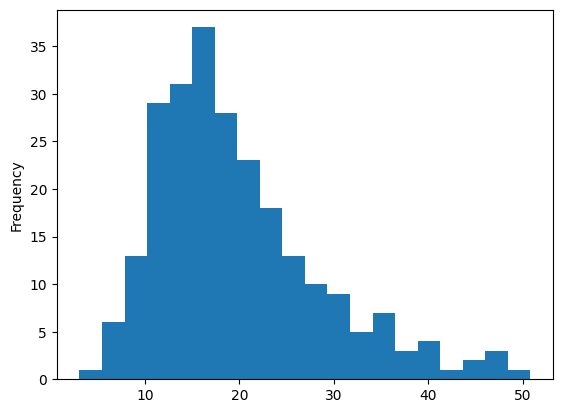

In [22]:
# Exercise Answer
tips['total_bill'].plot(kind = 'hist', bins = 20)

### Exercise 10: (5 points)
<span  style="color:purple; font-size:16px">Create a boxplot of the `total_bill` variable. Which summary statistics can you read off from this graphic? What are the 'dots' that appear at the top of the plot?</span>

<AxesSubplot: >

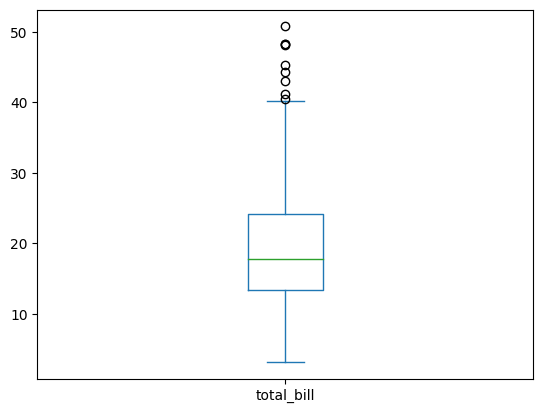

In [23]:
# Exercise Answer
tips['total_bill'].plot(kind = 'box')

# You can read the spread and the mean value off of this graphic. The dots that appear at the top of the plot are the 
# extreme values or outliers. 

### Exercise 11: (5 points)
<span  style="color:purple; font-size:16px">What is a 'typical' bill size? What measure would be appropriate for describing 'typical'?</span>

In [29]:
# Exercise Answer
# tips['total_bill'].mean()
tips['total_bill'].median().round(2)

# The appropriate value to describe the 'typical' bill size would be the median in this situation. This is because the data 
# is heavily right skewed which would also skew the mean value.

17.8

### Exercise 12: (5 points)
<span  style="color:purple; font-size:16px">Quantify the amount of variability in the total bill size by finding the standard deviation of the total bill size.</span>

In [33]:
# Exercise Answer
tips['total_bill'].std().round(2)

8.9

### Exercise 13: (5 points)
<span  style="color:purple; font-size:16px">The *MAD* or Median Absolute Deviation is defined to be $MAD = \text{median of } | {x_i - \text{median}} |$ is yet another estimate of variability. Use Pandas methods to calculate the MAD of the total bill size. Do this in three steps. First, find the overall median of total bill. Second, create a Series `abs_diff` containing the absolute value of differences ($| {x_i - \text{median}} |$) for each observation. Finally, report the median of the Series `abs_diff`.</span>

In [40]:
# Exercise Answer
median = tips['total_bill'].median()

abs_diff = (tips['total_bill'] - median)

abs_diff.median()

-1.7763568394002505e-15

### Exercise 14: (5 points)
<span  style="color:purple; font-size:16px">Quantify the amount of variability in the total bill size using the Interquartile Range defined to be: $IQR = Q_3 - Q_1$. Pandas does not have a built-in function to calculate this. First calculate $Q_1$ and $Q_3$ and then find the difference.</span>

In [42]:
# Exercise Answer
Q1 = tips['total_bill'].quantile(.25)
Q3 = tips['total_bill'].quantile(.75)

IQR = Q3 - Q1
IQR.round(2)

10.78

### Exercise 15: (5 points)
<span  style="color:purple; font-size:16px">Create a new variable, `tip_rate` which is the `tip_amount` divided by `total_bill`. Create a histogram of the new variable. Describe the shape and any unusual values you see. What appears to be the most typical tip size? Is this suprising or to be expected?</span>

<AxesSubplot: title={'center': 'Tip Rate'}, ylabel='Frequency'>

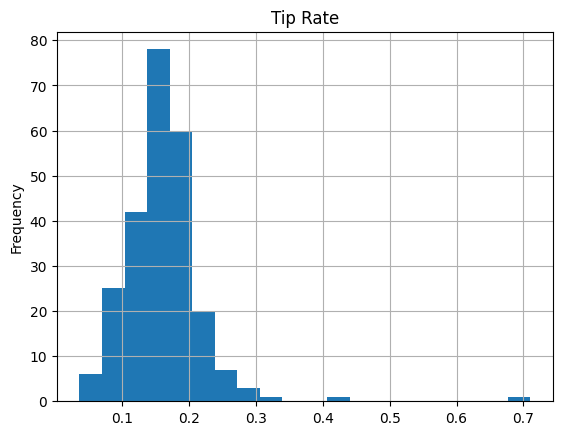

In [48]:
# Exercise Answer
tips['tip_rate'] = (tips['tip_amount'] / tips['total_bill'])

tips['tip_rate'].plot(kind = 'hist', bins = 20, grid = True, title = "Tip Rate")

# The histogram shows that the tip rate is right skewed with the "typical" party giving roughly 15%. This is expected.

### Exercise 16: (5 points)
<span  style="color:purple; font-size:16px">Extract the entire row of data for the 10 largest and 10 smallest values of `tip_rate`. This can be done different ways but these steps are one way. First, extract the 10 largest values and save this as a DataFrame called 'largest'. Create a new variable called 'largest_indexes' which is the index of 'largest'. Use the `.loc()` method to extract all the data corresponding to those indexes.</span>

In [96]:
# Exercise Answer
smallest = pd.DataFrame(tips['tip_rate'].nsmallest(10))
largest = pd.DataFrame(tips['tip_rate'].nlargest(10))
largest_indexes = largest.index
tips.loc[largest_indexes,:]

,total_bill,tip_amount,sex,smoker,day_of_week,time,party_size,tip_rate
172,7.25,5.15,Female,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Male,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Male,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Female,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Female,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Male,Yes,Sat,Dinner,2,0.279525
149,7.51,2.00,Female,No,Thur,Lunch,2,0.266312
93,16.32,4.30,Male,Yes,Fri,Dinner,2,0.263480
221,13.42,3.48,Male,Yes,Fri,Lunch,2,0.259314
51,10.29,2.60,Male,No,Sun,Dinner,2,0.252672


### Exercise 17: (5 points)
<span  style="color:purple; font-size:16px">Use the `.describe()` method to print out summary statistics for all numeric variables.</span>

In [73]:
# Exercise Answer
tips.describe(include=['int64', 'float64']).round(2)

,total_bill,tip_amount,party_size,tip_rate
count,244.00,244.00,244.00,244.00
mean,19.79,3.00,2.57,0.16
std,8.90,1.38,0.95,0.06
min,3.07,1.00,1.00,0.04
25%,13.35,2.00,2.00,0.13
50%,17.80,2.90,2.00,0.15
75%,24.13,3.56,3.00,0.19
max,50.81,10.00,6.00,0.71


### Exercise 18: (5 points)
<span  style="color:purple; font-size:16px">Use the `.describe()` method to print out summary statistics for all non-numeric variables.</span>

In [72]:
# Exercise Answer
tips.describe(include=['object']).round(1)

,sex,smoker,day_of_week,time
count,244,244,244,244
unique,2,2,4,2
top,Female,No,Sat,Dinner
freq,157,151,87,176


### Exercise 19: (5 points)
<span  style="color:purple; font-size:16px">Create a bar graph showing the number of parties served on each day of the week. What day had the heaviest volume (in terms of number of tables served)? What day had the lowest volume?</span>

<AxesSubplot: >

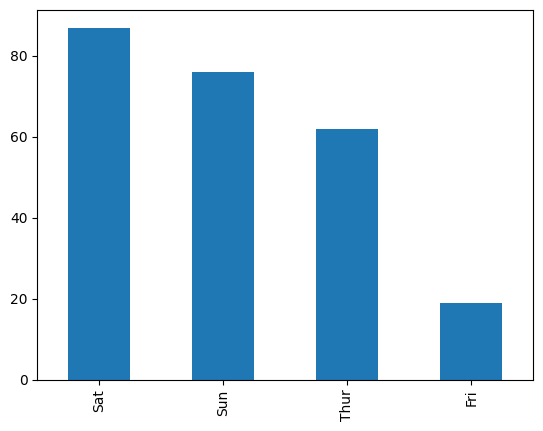

In [54]:
# Exercise Answer
tips['day_of_week'].value_counts().plot(kind = 'bar')

# Saturday had the heaviest volume, Friday had the lowest volume. 

### Exercise 20: (5 points)
<span  style="color:purple; font-size:16px">Create a Series showing the proportion of parties served for each day of the week. </span>

In [58]:
# Exercise Answer
tips['day_of_week'].value_counts(normalize = True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day_of_week, dtype: float64

### Exercise 21: (5 points)
<span  style="color:purple; font-size:16px">Find the total number of orders where the `total_bill` is greater than 40 dollars AND the party size was 4 or less.</span>

In [59]:
# Exercise Answer
((tips['total_bill'] > 40) & (tips['party_size'] <= 4)).value_counts()

# There were 8 total number of orders where the total_bill is greater than 40 dollars AND the party size was 4 or less.

False    236
True       8
dtype: int64

### Exercise 22: (5 points)
<span  style="color:purple; font-size:16px">Who pays the bill more often: men or women? Create a pie chart and create a Series showing the proportion of bills paid by each `sex`.</span>

<AxesSubplot: ylabel='sex'>

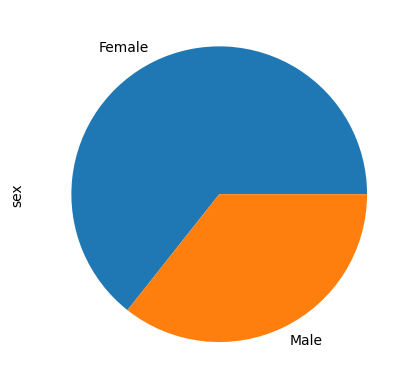

In [60]:
# Exercise Answer
tips['sex'].value_counts(normalize = True).plot(kind = 'pie')